In [150]:
import sys
sys.path.insert(1, '/its/home/drs25/Documents/GitHub/Quadruped/Code')
sys.path.insert(1, '/its/home/drs25/Quadruped/Code')
sys.path.insert(1, 'C:/Users/dexte/Documents/GitHub/Quadruped/Code')
sys.path.insert(1, '/its/home/drs25/Quadruped/Code/GAs')
import numpy as np 
import pandas as pd 
from os import walk
import pickle
from GA_gaitchange import F3
path_="/its/home/drs25/Quadruped/models/frictions_and_stuff/hillclimberF1/"

## Load in the data

### from evolution

In [151]:
f=[]

for (dirpath, dirnames, filenames) in walk(path_):
    f.extend(filenames)
    break
details={'friction':[],"speed":[],"stride":[],"body":[],"file":[],'best_idx':[],"fitness":[]}

for i in range(len(f)):
    if ".pkl" in f[i]:
        deets=f[i].replace(".pkl","").replace("friction","").split("_")
        fitnesses=np.load(path_+f[i].replace("genotypes","fitnesses").replace(".pkl",".npy"))
        deets2=deets[5].split("-")
        details['friction'].append(deets[4])
        details['speed'].append(deets2[2])
        details['stride'].append(deets2[0])
        details['body'].append(deets2[1])
        details['file'].append(f[i])
        details['best_idx'].append(np.argmax(fitnesses))
        details['fitness'].append(np.max(fitnesses))
actual_frame=pd.DataFrame(details)
actual_frame.head()

,friction,speed,stride,body,file,best_idx,fitness
0,0.25,2,2,2,genotypes_dt0.1__0.25_friction0.25_2-2-2.pkl,37,3.875104
1,0.05,2,2,2,genotypes_dt0.1__0.05_friction0.05_2-2-2.pkl,20,1.813467
2,0.2,2,2,2,genotypes_dt0.1__0.2_friction0.2_2-2-2.pkl,7,3.204660
3,0.15000000000000002,2,2,2,genotypes_dt0.1__0.15000000000000002_friction0...,39,2.510518
4,0.0,2,2,2,genotypes_dt0.1__0.0_friction0.0_2-2-2.pkl,48,0.796535


In [152]:
#run trials to get all of the trajectories
from environment import *
from CPG import *
trajectories=[]

for index,item in actual_frame.iterrows():
    print(index)
    #open the population from the experiment
    with open(path_+item['file'], 'rb') as f:
        population = pickle.load(f)
    env=environment(0,friction=float(item['friction']))
    _,history,_=env.runTrial(population[item['best_idx']],300)
    env.close()
    trajectories.append(history['positions'])

details['traj']=trajectories
actual_frame=pd.DataFrame(details)
actual_frame.head()

0
1
2
3
4
5
6


,friction,speed,stride,body,file,best_idx,fitness,traj
0,0.25,2,2,2,genotypes_dt0.1__0.25_friction0.25_2-2-2.pkl,37,3.875104,"[[0.0026108806702796247, -0.04058728784016191,..."
1,0.05,2,2,2,genotypes_dt0.1__0.05_friction0.05_2-2-2.pkl,20,1.813467,"[[0.00615095579006394, -0.031504925042059304, ..."
2,0.2,2,2,2,genotypes_dt0.1__0.2_friction0.2_2-2-2.pkl,7,3.204660,"[[-0.0020426696509380665, -0.03479541988341805..."
3,0.15000000000000002,2,2,2,genotypes_dt0.1__0.15000000000000002_friction0...,39,2.510518,"[[0.001465273454296584, -0.03647801880828605, ..."
4,0.0,2,2,2,genotypes_dt0.1__0.0_friction0.0_2-2-2.pkl,48,0.796535,"[[-0.0020307651208611266, -0.02339416865978235..."


### from changes

In [153]:
f=[]

for (dirpath, dirnames, filenames) in walk(path_):
    f.extend(filenames)
    break
details={'friction':[],"speed":[],"stride":[],"body":[],"file":[],"traj":[]}

for i in range(len(f)):
    if ".npz" in f[i]:
        deets=f[i].replace(".npz","").split("_")
        details['friction'].append(deets[0])
        details['stride'].append(deets[1])
        details['body'].append(deets[2])
        details['speed'].append(deets[3])
        details['file'].append(f[i])
        fi=dict(np.load(path_+f[i],allow_pickle=1))['arr_0'].item()
        traj=fi['positions']
        details['traj'].append(traj)

details_frame=pd.DataFrame(details)
details_frame.head()

,friction,speed,stride,body,file,traj
0,0.15000000000000002,1,2,2,0.15000000000000002_2_2_1.npz,"[[0.0010074415010493006, -0.03643949461282243,..."
1,0.25,2,0,2,0.25_0_2_2.npz,"[[0.0013178362684482196, -0.04081985245420229,..."
2,0.05,1,2,2,0.05_2_2_1.npz,"[[0.002748637587492849, -0.030722672824178978,..."
3,0.05,0,0,2,0.05_0_2_0.npz,"[[0.0032452931604775082, -0.034019095557771085..."
4,0.2,1,0,0,0.2_0_0_1.npz,"[[0.001900925071495431, -0.03638676328598168, ..."


## plotting

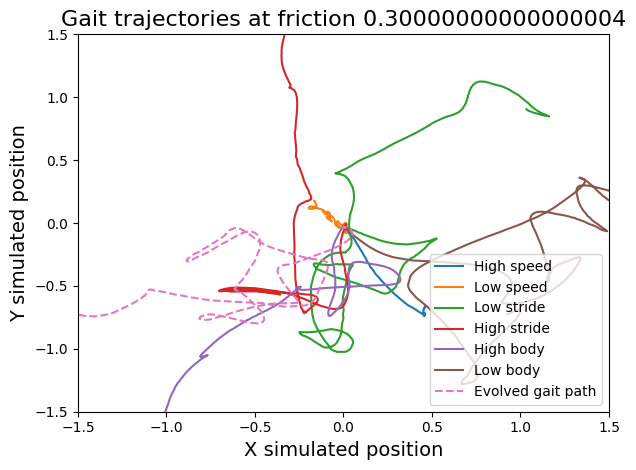

In [167]:
import matplotlib.pyplot as plt 

num=np.random.randint(0,len(list(details_frame.iterrows())))

def show(id):
    example_row=list(details_frame.iterrows())[id]
    fric=example_row[1]['friction']
    others = actual_frame.loc[actual_frame['friction'] == fric]
    coords2 = others.iloc[0]['traj']
    others_like=details_frame.loc[(details_frame['friction']==fric)]
    HIGHSPEED=others_like.loc[(others_like['speed']=='0') & (others_like['stride']=='2') & (others_like['body']=='2')].iloc[0]['traj']
    LOWSPEED=others_like.loc[(others_like['speed']=='1') & (others_like['stride']=='2') & (others_like['body']=='2')].iloc[0]['traj']
    HIGHSTRIDE=others_like.loc[(others_like['stride']=='0') & (others_like['speed']=='2') & (others_like['body']=='2')].iloc[0]['traj']
    LOWSTRIDE=others_like.loc[(others_like['stride']=='1') & (others_like['speed']=='2') & (others_like['body']=='2')].iloc[0]['traj']
    HIGHBODY=others_like.loc[(others_like['body']=='0') & (others_like['speed']=='2') & (others_like['stride']=='2')].iloc[0]['traj']
    LOWBODY=others_like.loc[(others_like['body']=='1') & (others_like['speed']=='2') & (others_like['stride']=='2')].iloc[0]['traj']


    plt.title("Gait trajectories at friction "+str(fric),fontsize=16)
    plt.plot(HIGHSPEED[:,0],HIGHSPEED[:,1],label="High speed")
    plt.plot(LOWSPEED[:,0],LOWSPEED[:,1],label="Low speed")
    plt.plot(LOWSTRIDE[:,0],LOWSTRIDE[:,1],label="Low stride")
    plt.plot(HIGHSTRIDE[:,0],HIGHSTRIDE[:,1],label="High stride")
    plt.plot(HIGHBODY[:,0],HIGHBODY[:,1],label="High body")
    plt.plot(LOWBODY[:,0],LOWBODY[:,1],label="Low body")
    plt.plot(coords2[:,0],coords2[:,1],"--",label="Evolved gait path")
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlim([-1.5,1.5])
    plt.ylim([-1.5,1.5])
    plt.xlabel("X simulated position",fontsize=14)
    plt.ylabel("Y simulated position",fontsize=14)
    plt.legend(loc="lower right")
    plt.tight_layout()
    #plt.savefig("/its/home/drs25/Quadruped/assets/plots/evolved_gaits"+str(id)+".pdf")
    plt.show()

show(num)

In [155]:
details_frame.loc[(details_frame['friction']=='0.25')]

,friction,speed,stride,body,file,traj
1,0.25,2,0,2,0.25_0_2_2.npz,"[[0.0013178362684482196, -0.04081985245420229,..."
8,0.25,1,0,1,0.25_0_1_1.npz,"[[-0.0005073985117626717, -0.03835505872546751..."
15,0.25,0,1,0,0.25_1_0_0.npz,"[[0.005210744898667739, -0.03986843345072546, ..."
31,0.25,0,2,1,0.25_2_1_0.npz,"[[0.002400456129172944, -0.04146213567721366, ..."
37,0.25,1,2,0,0.25_2_0_1.npz,"[[0.0018737023274313003, -0.03592905102207846,..."
38,0.25,0,0,1,0.25_0_1_0.npz,"[[0.001282357886447463, -0.041958341724502086,..."
42,0.25,2,1,0,0.25_1_0_2.npz,"[[0.005714557909933452, -0.039745792087596786,..."
51,0.25,1,2,2,0.25_2_2_1.npz,"[[0.00032599265572763386, -0.03565561465395197..."
56,0.25,2,0,0,0.25_0_0_2.npz,"[[0.0019458228495962593, -0.041063105200920255..."
58,0.25,1,2,1,0.25_2_1_1.npz,"[[0.0006475587458878095, -0.03560302300063762,..."
